# Smart City Data Visualization and Air Pollution Reason Analysis in Wuxi, China

## “FeiFeng ShuChuang” 2018 Global IoT Data Competition



Author：Jiqian Dong 




This project is on the base of air polution data in Wuxi, China. Take comprehensive considerations of weather (precipitation, wind speed, wind direction, temperature) and civic emissions (NO2, SO2, Smoke) to be the factors influencing the air quality. Using data visualization to get intuitive information of all these factors and using Machine Learning algorithm (Random Forest) to obtain the importances of these features.


## 1. Weather & Polution Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### 1.1 Raw Data Clean
Consider the temperature data from 2010-2018

In [2]:
weather_file = './cleaned_data/无锡市历史天气预报数据.xlsx'
weather_raw_all = pd.DataFrame()
yearly = []
max_temp_pattern = re.compile('(.*\d+).*/')
min_temp_pattern = re.compile('/(.*\d+)')
wind_direction_pattern = re.compile('([\u4e00-\u9fa5]+风)')
wind_strength_pattern = re.compile('(\d)')
wind_direction_pattern1 = re.compile('([\u4e00-\u9fa5]+风).*/')
wind_direction_pattern2 = re.compile('.*/([\u4e00-\u9fa5]+风)') 
weather_cond_pattern1 = re.compile('(.*)/')
weather_cond_pattern2 = re.compile('/(.*)')
rain_pattern = re.compile("[雨雪]")

for sheet in range(2011,2019):
    year = pd.read_excel(weather_file,date_parser=0,header=None,sheet_name=str(sheet))
    year.columns = ['time','desc','temp','wind']
    
    year['max_temp'] = year['temp'].apply(lambda x: int(max_temp_pattern.findall(x)[0].strip()))
    year['min_temp'] = year['temp'].apply(lambda x: int(min_temp_pattern.findall(x)[0].strip()))
    year['average_temp'] = (year['max_temp'] + year['min_temp'])/2
    
    year['max_wind'] = year['wind'].apply(lambda x: np.max(np.array(wind_strength_pattern.findall(x)).astype(np.int8)))
    
    year['wind_direction1'] = year['wind'].apply(lambda x: wind_direction_pattern1.findall(x)[0].strip())
    year['wind_direction2'] = year['wind'].apply(lambda x: wind_direction_pattern2.findall(x)[0].strip())
    
    year['weather_cond1'] = year['desc'].apply(lambda x: weather_cond_pattern1.findall(x)[0].strip())
    year['weather_cond2'] = year['desc'].apply(lambda x: weather_cond_pattern2.findall(x)[0].strip())
    
    year['rain_or_snow'] = year['desc'].apply(lambda x: rain_pattern.search(x)!=None)
    
    year['min<5'] = year['min_temp']<5
    
    weather_raw_all = pd.concat([weather_raw_all,year])
    yearly.append(year)

weather_raw_all = weather_raw_all.reset_index(drop=True)


In [3]:
weather_raw_all.head(3)

,time,desc,temp,wind,max_temp,min_temp,average_temp,max_wind,wind_direction1,wind_direction2,weather_cond1,weather_cond2,rain_or_snow,min<5
0,2011-01-01,晴 /多云,5℃ / -2℃,西北风 3-4级 /西北风 3-4级,5,-2,1.5,4,西北风,西北风,晴,多云,False,True
1,2011-01-02,多云 /雨夹雪,5℃ / 1℃,北风 3-4级 /北风 3-4级,5,1,3.0,4,北风,北风,多云,雨夹雪,True,True
2,2011-01-03,多云 /多云,5℃ / -1℃,北风 3-4级 /北风 3-4级,5,-1,2.0,4,北风,北风,多云,多云,False,True


### 1.2  Temperature change visualization

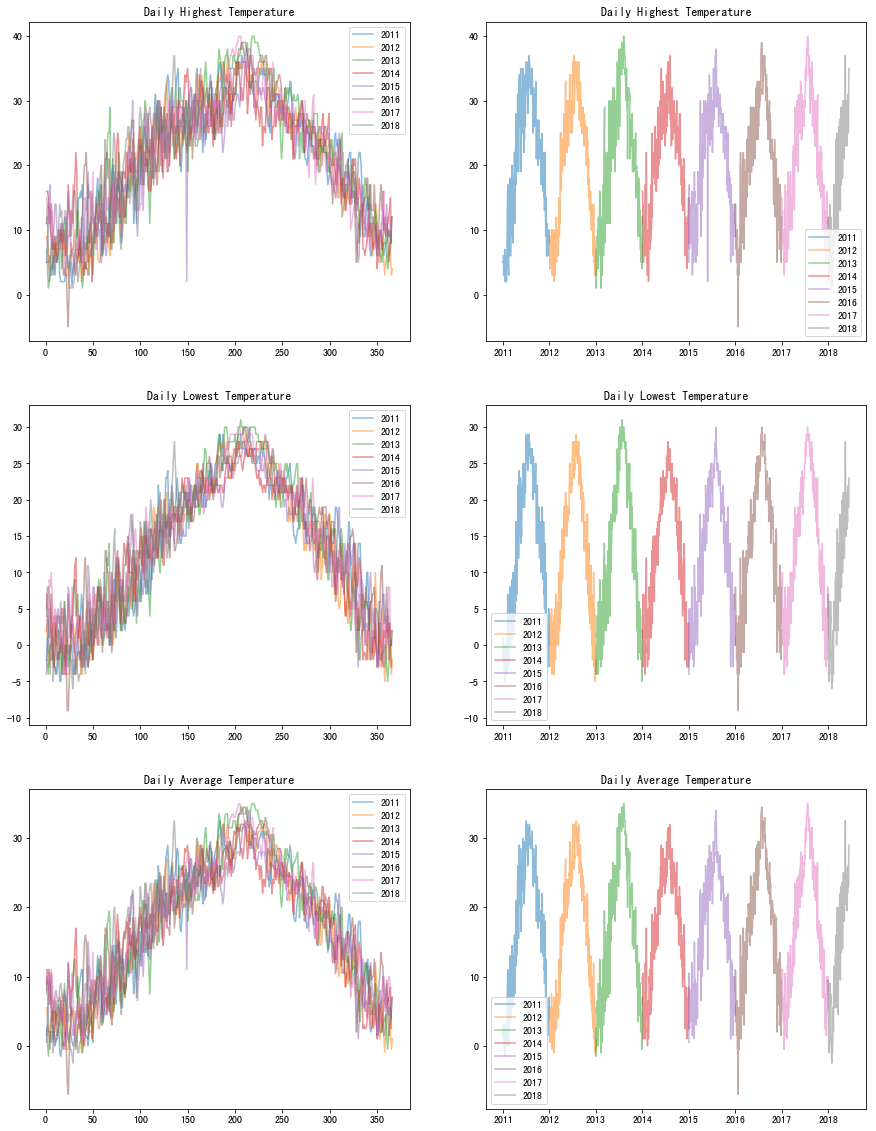

In [4]:
years = range(2011,2019)
fg = plt.figure(figsize=(15,20))
ax1 = fg.add_subplot(3,2,1)
ax2 = fg.add_subplot(3,2,2)
ax3 = fg.add_subplot(3,2,3)
ax4 = fg.add_subplot(3,2,4)
ax5 = fg.add_subplot(3,2,5)
ax6 = fg.add_subplot(3,2,6)

for year,df in zip(years, yearly):    
    ax1.plot(df['time'].dt.dayofyear,df['max_temp'],label = str(year),alpha=0.5)
ax1.legend()
ax1.set_title('Daily Highest Temperature')

for year,df in zip(years, yearly):    
    ax2.plot(df['time'].dt.date,df['max_temp'],label = str(year),alpha=0.5)
ax2.legend()
ax2.set_title('Daily Highest Temperature')


for year,df in zip(years, yearly):    
    ax3.plot(df['time'].dt.dayofyear,df['min_temp'],label = str(year),alpha=0.5)
ax3.legend()
ax3.set_title('Daily Lowest Temperature')
for year,df in zip(years, yearly):    
    ax4.plot(df['time'].dt.date,df['min_temp'],label = str(year),alpha=0.5)
ax4.legend()
ax4.set_title('Daily Lowest Temperature')


for year,df in zip(years, yearly):    
    ax5.plot(df['time'].dt.dayofyear,df['average_temp'],label = str(year),alpha=0.5)
ax5.legend()
ax5.set_title('Daily Average Temperature')

for year,df in zip(years, yearly):    
    ax6.plot(df['time'].dt.date,df['average_temp'],label = str(year),alpha=0.5)
ax6.legend()
ax6.set_title('Daily Average Temperature')
plt.show()  


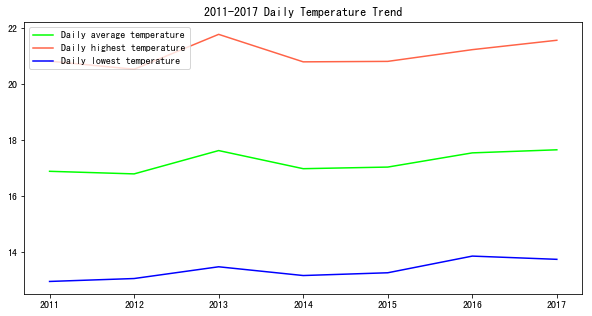

In [5]:
yearly_average_temp = [df['average_temp'].mean() for df in yearly]
yearly_max_temp = [df['max_temp'].mean() for df in yearly]
yearly_min_temp = [df['min_temp'].mean() for df in yearly]

plt.figure(figsize=(10,5))
plt.plot(years[:-1],yearly_average_temp[:-1],'lime',label='Daily average temperature')
plt.plot(years[:-1],yearly_max_temp[:-1],'tomato',label='Daily highest temperature')
plt.plot(years[:-1],yearly_min_temp[:-1],'blue',label='Daily lowest temperature')
plt.legend()
plt.title('2011-2017 Daily Temperature Trend')
plt.plot()
plt.show()

From the figure above, the temperature reaches the peak in 2013, there is an overall trend of warming.

### 1.3 Weather Condition & Wind Direction Distributions

<font color=red>Since the descriptions of weather and wind direction in the original dataset are written in Chinese, I will just keep it. <font>

In [6]:
# Data plot sequence

weather_sequence = ['晴','小雨' ,'小到中雨' ,'中雨' ,'中到大雨' ,
                    '大雨' ,'阵雨' ,'暴雨' ,'雷阵雨' ,'多云' ,
                    '雾' ,'霾','阴' ,'小雪' ,'小到中雪' ,
                   '中雪' ,'中到大雪','大雪','暴雪','雨夹雪']

wind_sequence = ['东风', '东北风', '北风', '西北风',
                 '西风', '西南风', '南风', '东南风']

# wind_sequence = ['East', 'Northeast', 'North', 'Northwest',
#                  'West', 'Southwest', 'South', 'Southeast']

wind_yearly = []
weather_yearly = []

for year in yearly:
    weather_cond = pd.concat([year['weather_cond1'],year['weather_cond2']])
    wind_direction = pd.concat([year['wind_direction1'],year['wind_direction2']])    
    weather_cond, weather_count = np.unique(weather_cond,return_counts=True)
    wind_direction, wind_count = np.unique(wind_direction,return_counts=True)
    wind = {seq:0 for seq in wind_sequence}
    weather = {seq:0 for seq in weather_sequence}
    for ind,key in enumerate(wind_direction):
        wind[key] = wind_count[ind]
    wind_yearly.append(wind)
        
    for ind,key in enumerate(weather_cond):
        weather[key] = weather_count[ind]
    weather_yearly.append(weather)
        
weather_yearly[-1]["小到中雨"] = weather_yearly[-1].pop("小雨-中雨")

In [7]:
# Rose map color
colors = [(206/255,32/255,69/255),
          (34/255,66/255,123/255),
         '#f69c9f',
         '#6a6da9']

# Draw rose map
def draw_cone(d,ax,colors, name = None):
    cond = []
    count = []

    for key in d.keys():
        if d[key]>0:
            count.append(d[key])
            cond.append(key)
    
    x1=[np.pi/10+np.pi*i/5 for i in range(1,11)]
    maximum = np.log(np.max(count))
    num_bar = len(cond)
    
    y1=[1.3*maximum for i in range(0,10)]
    y2=[1.1*maximum for i in range(0,10)]
    
    ax.axis('off')
    ax.bar(x=x1, height=y1,width=np.pi/5,color=(220/255,222/255,221/255))
    ax.bar(x=x1, height=y2,width=np.pi/5,color='w')
    for i in range(num_bar):
        x_ = np.pi*2/num_bar*i#+ np.pi/num_bar
        height = np.log(count[i])*0.8+0.3*maximum
        ax.bar(x=x_, height=height,width=2*np.pi/num_bar*0.9,color=colors[i%2],label=cond[i])
        ax.annotate(cond[i],xy=(x_,maximum*1.2),xytext=(x_,maximum*1.45), textcoords='data',horizontalalignment='center', verticalalignment='center')
        ax.annotate(str(count[i]),xy=(x_,maximum*1.2),xytext=(x_,height*1.1), textcoords='data',horizontalalignment='center', verticalalignment='center',color = colors[i%2])
    y6=[0.3*maximum for i in range(0,10)]
    ax.bar(x=x1, height=y6,width=np.pi/5,color='w',edgecolor='w')
    ax.set_title(name) 


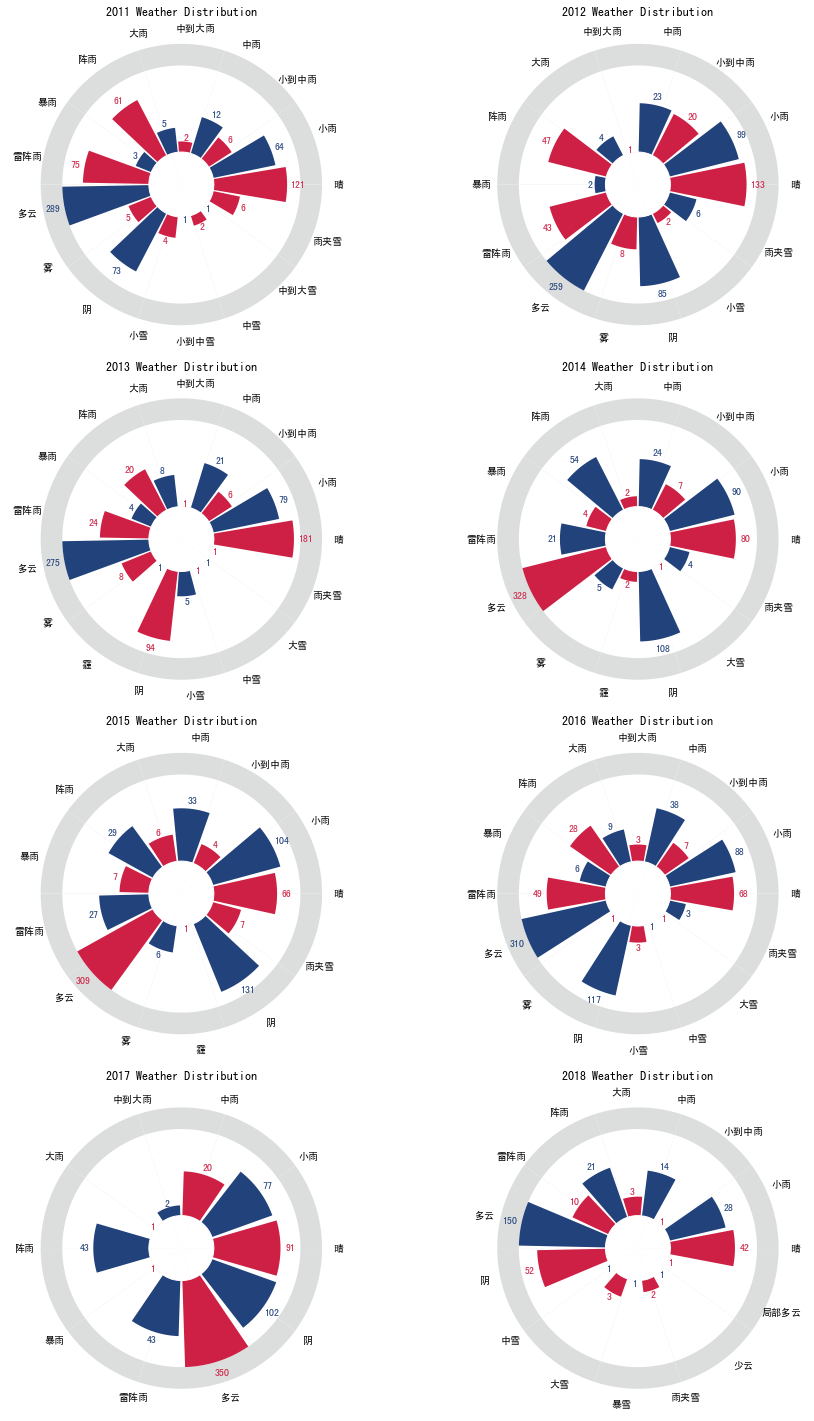

In [8]:
# Weather Distribution
fig = plt.figure(figsize=(15,25))
for ind in range(len(weather_yearly)):
    ax = fig.add_subplot(len(wind_yearly)//2,2,ind+1,projection='polar')
    draw_cone(weather_yearly[ind],ax,colors[:2],name = str(years[ind])+' Weather Distribution')

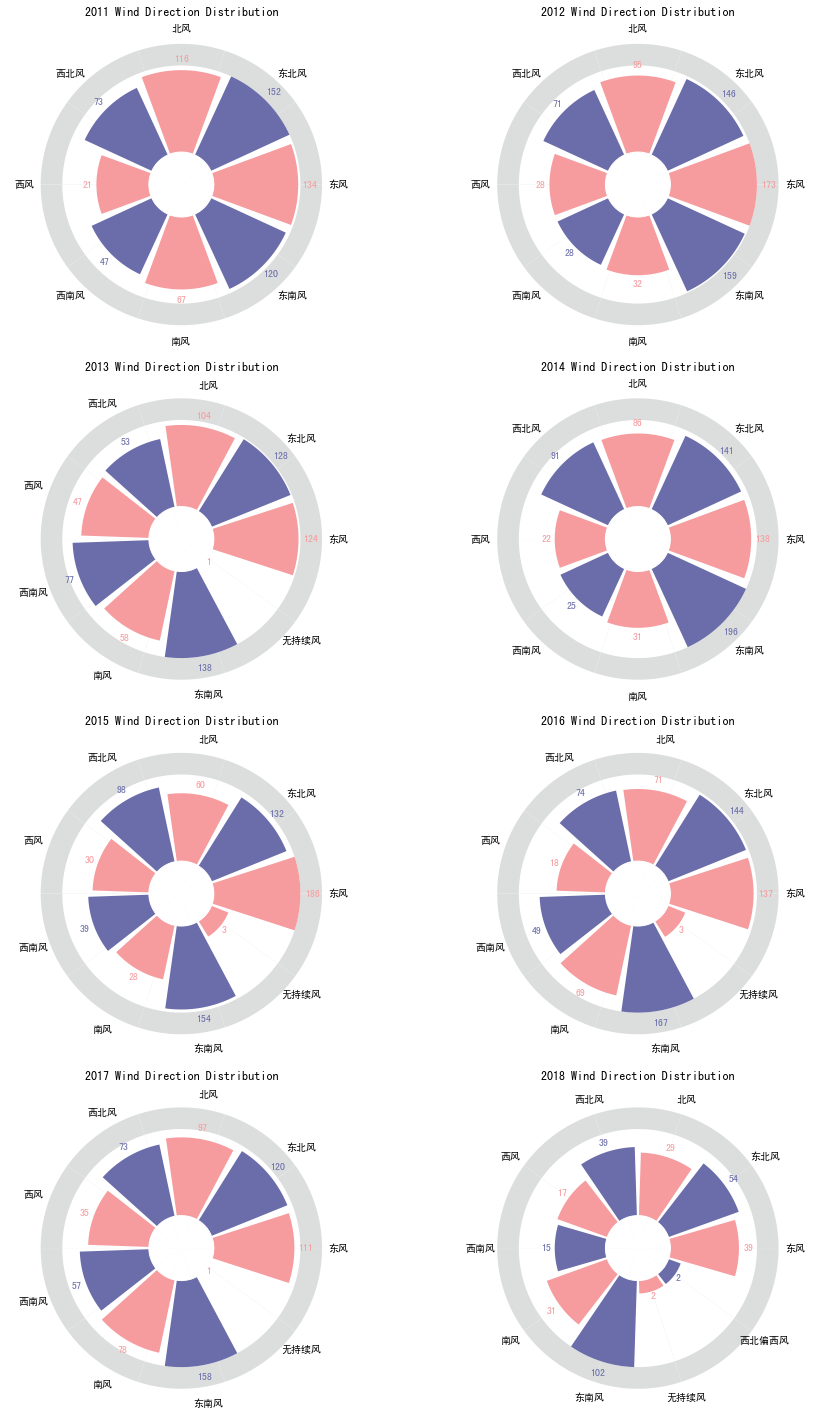

In [9]:
# draw wind Distribution
fig2 = plt.figure(figsize=(15,25))
for i in range(len(wind_yearly)):
    ax2 = fig2.add_subplot(len(wind_yearly)//2,2,i+1,projection='polar')
    draw_cone(wind_yearly[i],ax2,colors[2:4], name = str(years[i])+' Wind Direction Distribution')

In [10]:
# Link wind direction with its strength
wind_direction_ratio = []
unique_wind_direction = ['东北风','东南风','东风','北风','南风','西北风',
                         '西南风','西风','无持续风']
for year in wind_yearly[:-1]:
    wd_r = {}
    total = np.sum(list(year.values()))
    for d in unique_wind_direction:
        wd_r[d] = year.get(d,0)/total
    wind_direction_ratio.append(wd_r)

### 1.4 Precipitation, Heavy wind 
Consider both rain and snow will bring precipitation, which further will influence the air quality. Thus in the data cleaning process (1.1), we use a booling column to indecate whether there exists precipitation that day.

The total days of precipitation are summed yearly as a feature of incluencing the air quality:

In [11]:
ratio_rain_yearly = []
for year,d in zip(years,yearly):
    days_rain = np.sum(d['rain_or_snow'])
    print('%d has %d days of precipitation, which accounts for %.3f %% in that year\n'%(year,days_rain,days_rain/len(d)*100))
    ratio_rain_yearly.append(days_rain/len(d))

2011 has 155 days of precipitation, which accounts for 42.466 % in that year

2012 has 158 days of precipitation, which accounts for 43.169 % in that year

2013 has 113 days of precipitation, which accounts for 30.959 % in that year

2014 has 137 days of precipitation, which accounts for 37.534 % in that year

2015 has 144 days of precipitation, which accounts for 39.452 % in that year

2016 has 154 days of precipitation, which accounts for 42.077 % in that year

2017 has 125 days of precipitation, which accounts for 34.247 % in that year

2018 has 53 days of precipitation, which accounts for 32.121 % in that year



Since the wind scale and direction are the key influential factors of changing the air quality. We add the wind feature by calcualting the fraction of days with strong wind each year. We also define when the Beaufort wind scale reaches 5 or higher in each day, the wind is strong.

In [12]:
ratio_heavy_wind_yearly = []
for year,d in zip(years,yearly):
    days_heavy_wind = np.sum(d['max_wind']>4)
    print('%d has %d days of heavy wind, which accounts for %.3f %% in that year\n'%(year,days_heavy_wind,days_heavy_wind/len(d)*100))
    ratio_heavy_wind_yearly.append(days_heavy_wind/len(d))    

2011 has 67 days of heavy wind, which accounts for 18.356 % in that year

2012 has 78 days of heavy wind, which accounts for 21.311 % in that year

2013 has 77 days of heavy wind, which accounts for 21.096 % in that year

2014 has 69 days of heavy wind, which accounts for 18.904 % in that year

2015 has 30 days of heavy wind, which accounts for 8.219 % in that year

2016 has 38 days of heavy wind, which accounts for 10.383 % in that year

2017 has 29 days of heavy wind, which accounts for 7.945 % in that year

2018 has 18 days of heavy wind, which accounts for 10.909 % in that year



Further, as the low temperature may seduce people warm themselves by burning fossil fuels, we can also take temperature as a key feature. Specially, we categorize the days into low temperature days if their lowest temperature drops below 5. We calculate the fraction of low temperature each year as following.

In [13]:
ratio_low_temp_yearly = []
for year,d in zip(years,yearly):
    days_low_temp = np.sum(d['min<5'])
    print('%d has %d days of low temperature, which accounts for %.3f %% in that year\n'%(year,days_low_temp,days_low_temp/len(d)*100))
    ratio_low_temp_yearly.append(days_low_temp/len(d)) 

2011 has 99 days of low temperature, which accounts for 27.123 % in that year

2012 has 95 days of low temperature, which accounts for 25.956 % in that year

2013 has 91 days of low temperature, which accounts for 24.932 % in that year

2014 has 89 days of low temperature, which accounts for 24.384 % in that year

2015 has 80 days of low temperature, which accounts for 21.918 % in that year

2016 has 77 days of low temperature, which accounts for 21.038 % in that year

2017 has 83 days of low temperature, which accounts for 22.740 % in that year

2018 has 55 days of low temperature, which accounts for 33.333 % in that year



### 1.5 空气污染数据可视化

In [14]:
air_polution_file = './cleaned_data/空气质量.csv' 
air_p_raw = pd.read_csv(air_polution_file,parse_dates=[0])
air_p_raw['时间'] = pd.to_datetime(air_p_raw['时间'],format='%y')
air_p_raw.columns = ['Time','SO2(mg/m3)','NO2(mg/m3)','InhaleParticles(mg/m3)']
air_p_raw.head(3)

,Time,SO2(mg/m3),NO2(mg/m3),InhaleParticles(mg/m3)
0,2002-01-01,0.057,0.040,0.133
1,2003-01-01,0.054,0.041,0.100
2,2004-01-01,0.075,0.042,0.118


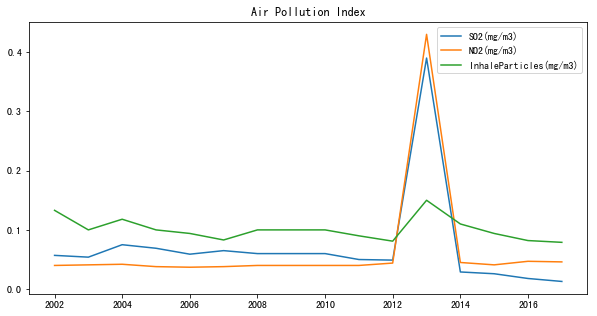

In [15]:
plt.figure(figsize=(10,5))
for col in air_p_raw.columns[1:]:
    plt.plot(air_p_raw['Time'],air_p_raw[col],label=col)
plt.legend()
plt.title('Air Pollution Index')
plt.show()

From the figure above, except the extreme air pollution in 2013, the polution index remains steady in the rest years.

### 1.6 Emission data visualization

In [16]:
air_emit_file = './cleaned_data/空气排放.csv' 
air_emit_raw = pd.read_csv(air_emit_file,parse_dates=[0],usecols=[0,2,6,10])
air_emit_raw.columns = ['Time','Total SO2 Emission (10000 tons)','Total NO2 Emission (10000 tons)', 
                        'Total Smoke Emission (10000 tons)']

air_emit_raw

,Time,Total SO2 Emission (10000 tons),Total NO2 Emission (10000 tons),Total Smoke Emission (10000 tons)
0,2000-01-01,8.176,NaN,2.291
1,2001-01-01,9.620,NaN,2.800
2,2002-01-01,10.386,NaN,2.499
3,2003-01-01,9.720,NaN,2.430
4,2004-01-01,13.990,NaN,4.480
5,2005-01-01,21.400,NaN,5.200
6,2006-01-01,23.570,NaN,5.590
7,2007-01-01,30.190,NaN,6.250
8,2008-01-01,10.190,NaN,4.760
9,2009-01-01,10.480,NaN,4.440


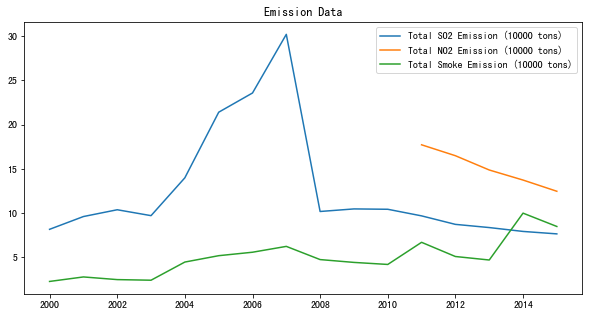

In [17]:
plt.figure(figsize=(10,5))
select_cols = [1,2,3]
for col in select_cols:
    plt.plot(air_emit_raw['Time'],air_emit_raw.iloc[:,col],label= air_emit_raw.columns[col])
plt.legend()
plt.title('Emission Data')
plt.show()

From the figure above. In year 2013 the pollution indices reached the peak, while the emmision indices remained at a comparetively low level.<font color=red>Thus there doesn't exist any obvious relationship between pollution and emission.</font> :( How could it possible???

## 2. The Reasons of Annual Air Pollution 

From the data visualization work above, we can't quantify the relationship between air pollution, annual emmision and weather conditions. There even exist some counter-intuitive facts, for example, the air polution indices have nothing to do with the emmision indices.

To further find out the key influencing factor, we decide to use some machine learning algorithm to calculate the feature importances. Thus we compile the raw data to a large training data set containing: Precipitation Ratio (fraction of days with precipitation in a year), Heavy Wind Ratio (fraction of days with heavy wind in a year), Wind Direction Fraction, Emission Indicies, including SO2, NO2, Inhale Particles, Temperature (Daily Highest Temperature) 

As there exist missing entries in the raw data, we finally choose the year 2011-2015 for further investigation.


### 2.1 Training data compiling

In [18]:
polution = air_p_raw.iloc[9:-1,:].reset_index(drop=True)
emission = air_emit_raw.iloc[11:,[0]+select_cols].reset_index(drop=True)
wind_direction = pd.DataFrame(wind_direction_ratio).iloc[:-1,:]
climate = pd.DataFrame(data={'Time':years[:-1],
                   'Low_temp_ratio':ratio_low_temp_yearly[:-1],
                   'Precipitation_ratio':ratio_rain_yearly[:-1],
                   'Heavy_wind_ratio':ratio_heavy_wind_yearly[:-1],
                  }).iloc[:-1,:]
climate['Time'] = emission['Time']
wind_direction['Time'] = emission['Time']
dfs = [polution,emission,wind_direction,climate]
for ind,df in enumerate(dfs):
    dfs[ind] = df.set_index(['Time'])

In [19]:
total_data = pd.concat(dfs,axis=1)
total_data = total_data.iloc[:-1,:]
total_data.columns = ['SO2','NO2','Particles','SO2 Emission','NO2 Emission','Smoke Emission',
 'Northeast_wind','Southeast_wind','East_wind',
'North_wind','South_wind','No_wind',
'Northwest_wind','Southwest_wind','West_wind',
 'Heavy_wind_ratio', 'Low_temp_ratio','Precipitation_ratio'
]


In [20]:
total_data.head(5)

,SO2,NO2,Particles,SO2 Emission,NO2 Emission,Smoke Emission,Northeast_wind,Southeast_wind,East_wind,North_wind,South_wind,No_wind,Northwest_wind,Southwest_wind,West_wind,Heavy_wind_ratio,Low_temp_ratio,Precipitation_ratio
Time,,,,,,,,,,,,,,,,,,
2011-01-01,0.050,0.040,0.090,9.695,17.720,6.709,0.208219,0.164384,0.183562,0.158904,0.091781,0.00000,0.100000,0.064384,0.028767,0.183562,0.271233,0.424658
2012-01-01,0.049,0.044,0.081,8.736,16.489,5.107,0.199454,0.217213,0.236339,0.129781,0.043716,0.00000,0.096995,0.038251,0.038251,0.213115,0.259563,0.431694
2013-01-01,0.390,0.430,0.150,8.375,14.875,4.712,0.175342,0.189041,0.169863,0.142466,0.079452,0.00137,0.072603,0.105479,0.064384,0.210959,0.249315,0.309589
2014-01-01,0.029,0.045,0.110,7.938,13.739,10.003,0.193151,0.268493,0.189041,0.117808,0.042466,0.00000,0.124658,0.034247,0.030137,0.189041,0.243836,0.375342
2015-01-01,0.026,0.041,0.094,7.662,12.473,8.498,0.180822,0.210959,0.254795,0.082192,0.038356,0.00411,0.134247,0.053425,0.041096,0.082192,0.219178,0.394521


### 2.2 Model Regression & Feature Importance Calculation

The table above list the first 5 lines of training set. The regression values are the pollution indices which are listed first 3 columns (SO2, NO2, Particles). The predictors are the rest of the columns. The algorithm for this analysis is random forest regression. Scikit learn has the good api for doing so.

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
index = ['SO2','NO2','Particles']
ys = [total_data['SO2'],total_data['NO2'],total_data['Particles']]
X = total_data.iloc[:,3:]

In [23]:
# Three models for three indices
rfs = []
for i in range(3):
    rf = RandomForestRegressor(max_depth=4,n_estimators=10,random_state=10)
    rf.fit(X,ys[i])
    rfs.append(rf)

### 2.3 The model performance 

In [24]:
# Accuracy analysis
for ind,rf in enumerate(rfs):
    print(index[ind]+' Index has the score of ：%.3f'%rf.score(X,ys[ind]))
    print()

SO2 Index has the score of ：0.877

NO2 Index has the score of ：0.888

Particles Index has the score of ：0.790



Visulize the performance

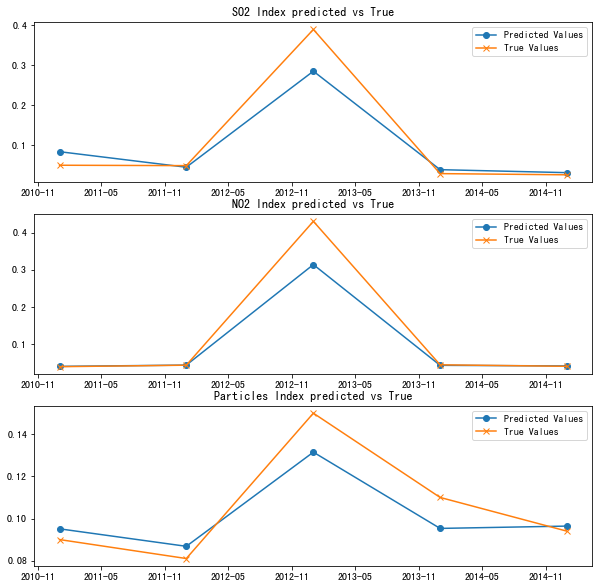

In [25]:
fig = plt.figure(figsize=(10,10))
for ind,rf in enumerate(rfs):
    ax = fig.add_subplot(3,1,ind+1)
    ax.plot(X.index, rf.predict(X),label='Predicted Values',marker = 'o')
    ax.plot(X.index, ys[ind], label='True Values',marker='x')
    ax.set_title(index[ind]+' Index predicted vs True')
    ax.legend()

Analysis: Since the dataset is comparatively small, it seems the model has ideal performance on the training set (a trend of overfitting). The model can capture the over all trend of each polution index, thus it is reasonable to calculate the feature importance according to this model.


### 2.4 Feature Importance Calculation

In [26]:
# Feature Importance 
for ind,rf in enumerate(rfs):
    print('The factors influencing '+ index[ind] + ' index are listed below:')
    print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X.columns), reverse=True),'\n')

The factors influencing SO2 index are listed below:
[(0.2994, 'Southwest_wind'), (0.1005, 'SO2 Emission'), (0.1002, 'Northeast_wind'), (0.1002, 'East_wind'), (0.1, 'Heavy_wind_ratio'), (0.0998, 'Northwest_wind'), (0.0998, 'North_wind'), (0.0994, 'West_wind'), (0.0007, 'South_wind'), (0.0, 'Southeast_wind'), (0.0, 'Smoke Emission'), (0.0, 'Precipitation_ratio'), (0.0, 'No_wind'), (0.0, 'NO2 Emission'), (0.0, 'Low_temp_ratio')] 

The factors influencing NO2 index are listed below:
[(0.3983, 'Southwest_wind'), (0.1, 'West_wind'), (0.1, 'Northwest_wind'), (0.1, 'Northeast_wind'), (0.1, 'NO2 Emission'), (0.1, 'East_wind'), (0.0947, 'Heavy_wind_ratio'), (0.0048, 'Southeast_wind'), (0.0023, 'SO2 Emission'), (0.0, 'South_wind'), (0.0, 'Smoke Emission'), (0.0, 'Precipitation_ratio'), (0.0, 'North_wind'), (0.0, 'No_wind'), (0.0, 'Low_temp_ratio')] 

The factors influencing Particles index are listed below:
[(0.212, 'Southwest_wind'), (0.1941, 'Smoke Emission'), (0.1865, 'Northwest_wind'), (0.106

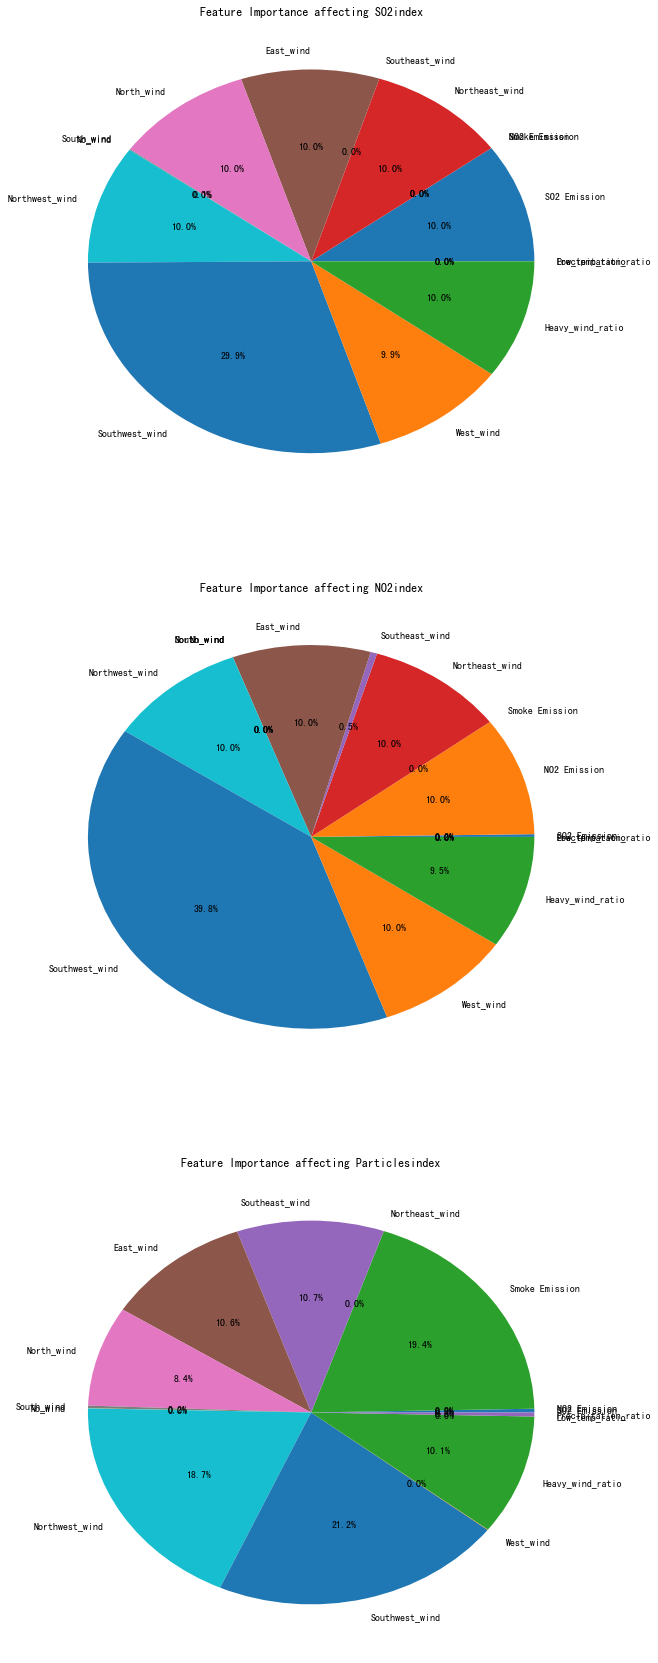

In [27]:
fig = plt.figure(figsize=(10,30))
for ind,rf in enumerate(rfs):
    ax = fig.add_subplot(3,1,ind+1)
    ax.pie(rf.feature_importances_,labels=X.columns,autopct='%1.1f%%')
    ax.set_title('Feature Importance affecting '+index[ind]+'index')

## 3. Analysis & Conclusion

### 3.1 Analysis

From the results listed above:
The key factor influencing all these 3 indices is the wind direction, especially the <font color=red> southwest wind. </font> However, according to the wind direction frequency map in 1.3, the wind from west doesn't accout for a large fraction of the entire year. The reason for this may because there exist many heavy pollution factories in the southeast of Wuxi. Only a small fraction of wind will bring heavy pollution.

According to the result above, we strongly suggest the govenment in Wuxi pay more attention to the factories and industries in the west of Wuxi. The amelioration of air pollution needs not only concentration on the city's own emmision, but also the comprehensive measures focus on the surrounding areas.


### 3.2 Conclusion

This project mainly focus on the key factors causing air pollution in Wuxi. We comprehensively consider the emmisions and weather conditions, mannualy select several features to predict the pollution indices. As the result of regression, the Random Forest Regressor has nice performance of capturing the over all trend of air pollution, and the score of regression is ideal.

Although it is reasonable to draw the conclusions above, the main deficit in this project is obvious: insufficient training data (especially short for emmision data). It is caused by low sample frequency (once per year) and severe data missing. 

The more scientific way of analyzing is to increase the sample rate for all the emmsion and polution data, let's say gather the data seasonly. I am sure the performance and the analysis will be more accurate.